<a href="https://colab.research.google.com/github/einsteinxx/UCLA_BE223C_SPRING_2021/blob/main/get_dbt_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt

#
# Read Data from google drive
#
from google.colab import drive #for loading gdrive data
from google.colab import files

# install dependencies not included by Colab
# use pip3 to ensure compatibility w/ Google Deep Learning Images 
!pip3 install -q pydicom 
!pip3 install -q tqdm 
!pip3 install -q imgaug 
!pip3 install -q SimpleITK
!pip3 install -q medpy

import SimpleITK as sitk  #for reading mha files
from medpy.io import load #mha files
import pydicom #to read dicom files




#
# Load data from google drive
#

drive.mount('/content/gdrive')




Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
'''
GET FILE LISTING----------------------------------------------------------------
'''
def get_dirs(top_dir): 
    import os

    dir_list = os.scandir(top_dir)
    directories=[]
    file_list = {}
    for ii in dir_list:
        file_list[ii.name]=[]
        directories.append(ii.name)
        #get file listings for each directory found
        full_name = os.path.join(top_dir,ii.name)
        print(ii,full_name)
        if (os.path.isdir(full_name) == 1):
            print('dir found')
            files = os.scandir(full_name) #os.path.join(top_dir,ii.name))
        else:
            files = full_name
            print('-----  ',ii)
        
        for jj in files:
            file_list[ii.name].append(jj.name)


    
    return directories, file_list

In [4]:
### Main level
top_dir = '/content/gdrive/My Drive/DBT_DATA/'


upper_dir =top_dir
main_dir, flist = get_dirs(upper_dir)

for ii in main_dir:
    print(ii)

<DirEntry 'TEST_DATA'> /content/gdrive/My Drive/DBT_DATA/TEST_DATA
dir found
<DirEntry 'VALIDATION'> /content/gdrive/My Drive/DBT_DATA/VALIDATION
dir found
<DirEntry 'TRAINING_DATA'> /content/gdrive/My Drive/DBT_DATA/TRAINING_DATA
dir found
TEST_DATA
VALIDATION
TRAINING_DATA


In [ ]:
'''
for key_val in flist.keys():
    print(flist[key_val])
    new_upper = os.path.join(upper_dir, key_val,str(flist[key_val][0]))
    temp_dir,temp_list= get_dirs(new_upper)
    print('---- ', temp_dir)

In [ ]:
 ###
 ### Build links to dcm files
 ###
 print('upper dir = ',upper_dir)
 counter = 0
 for root, directories, filenames in os.walk(upper_dir): 
    for directory in directories: 
        print('dir = ',os.path.join(root, directory))
    for filename in filenames:  
        print('f= ',os.path.join(root,filename))
        counter = counter + 1
        if (counter > 10):
            break
    if (counter > 10):
        break

DBT-P00118


/usr/local/lib/python3.7/dist-packages/pydicom/pixel_data_handlers/pillow_handler.py:177: UserWarning: The (0028,0101) 'Bits Stored' value (10-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  f"The (0028,0101) 'Bits Stored' value ({ds.BitsStored}-bit) "


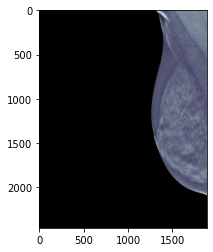

In [27]:
### Open dcm file
###
from pydicom import dcmread
file = '/content/gdrive/My Drive/DBT_DATA/TEST_DATA/manifest-1605042674814/Breast-Cancer-Screening-DBT/DBT-P00118/01-01-2000-DBT-S05386-MAMMO screening digital bilateral-70928/7697.000000-17471/1-1.dcm'


ds = dcmread(file)
print(ds.PatientName)
ds.file_meta.TransferSyntaxUID
plt.imshow(ds.pixel_array[0,:,:], cmap=plt.cm.bone) 


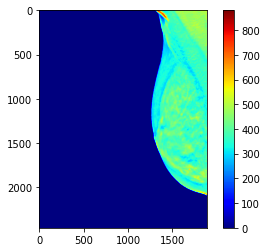

In [25]:
np.shape(ds.pixel_array)
ds_slice = ds.pixel_array[0,:,:]
plt.imshow(ds_slice, cmap=plt.cm.jet)
plt.colorbar()